In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gdp=pd.read_csv("data/Gdp.csv",encoding="utf-8")
gdp.head()

,date,GDP,Economic growth rate
0,2015-01-01,394273.0,2.4
1,2015-02-01,394273.0,2.4
2,2015-03-01,394273.0,2.4
3,2015-04-01,411387.0,2.0
4,2015-05-01,411387.0,2.0


In [3]:
gdp.shape

(112, 3)

In [4]:
# 결측치는 없습니다
# 그러나 월별 데이터만 존재하므로 일별 데이터로 변경해줍니다
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  112 non-null    object 
 1   GDP                   111 non-null    float64
 2   Economic growth rate  111 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


In [5]:
gdp.describe()

,GDP,Economic growth rate
count,111.000000,111.000000
mean,487991.756757,2.354054
std,50249.120250,1.547008
min,394273.000000,-2.600000
25%,453268.000000,1.400000
50%,484679.000000,2.700000
75%,523816.000000,3.100000
max,587840.000000,6.400000


In [6]:
gdp.dtypes

date                     object
GDP                     float64
Economic growth rate    float64
dtype: object

In [7]:
#날짜 형식 변경
gdp['date'] = pd.to_datetime(gdp['date'])

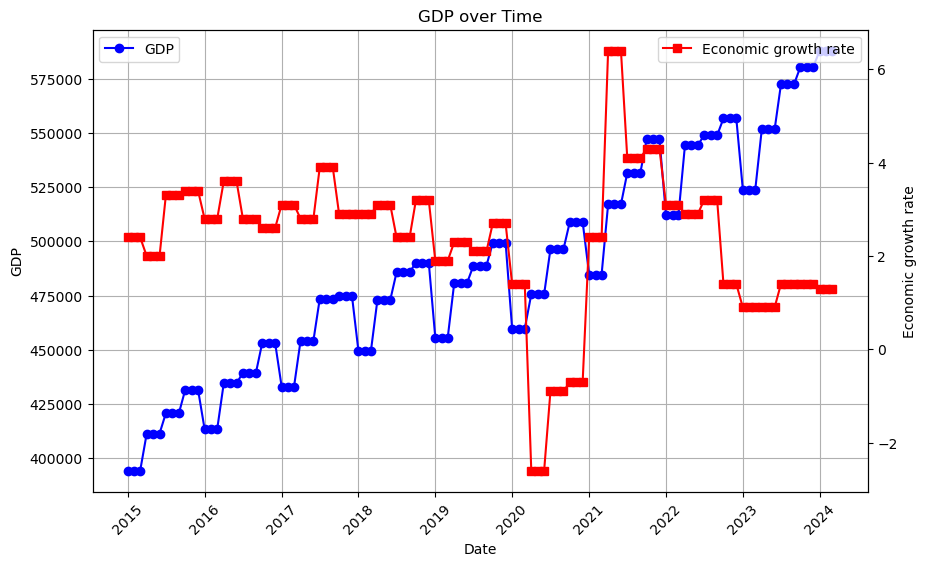

In [8]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(gdp['date'], gdp['GDP'], marker='o', color='b', label='GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# 오른쪽 y축 생성
plt.twinx()
plt.plot(gdp['date'], gdp['Economic growth rate'], marker='s', color='r', label='Economic growth rate')
plt.ylabel('Economic growth rate')
plt.legend(loc='upper right')

plt.show()

In [9]:
# 코로나가 터지면서 전세계적으로 경제성장률이 급격히 침체되었던 것을 발견

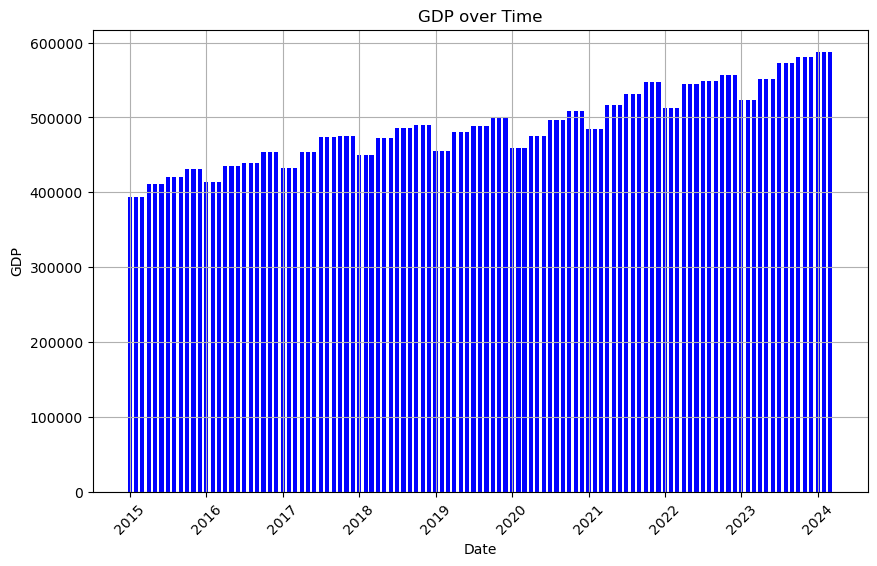

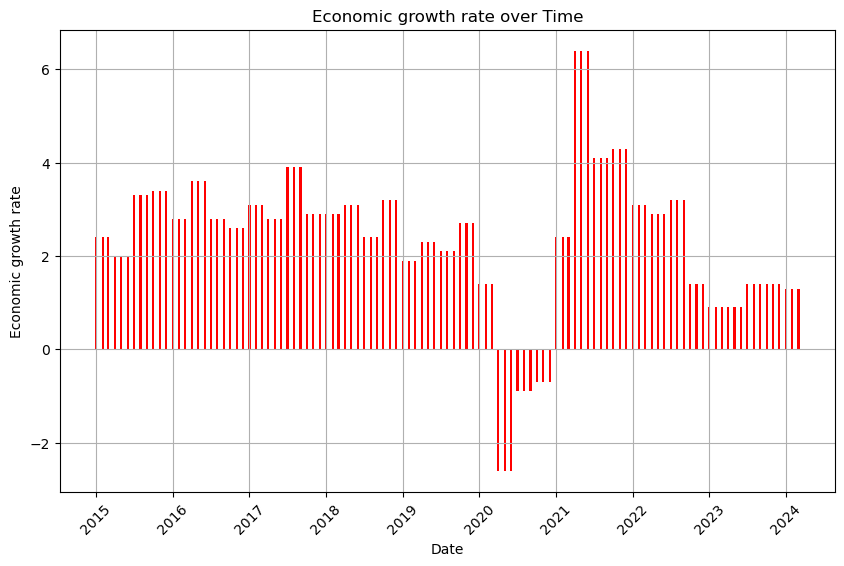

In [10]:
## GDP 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(gdp['date'], gdp['GDP'], color='b', width=20)
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

# Economic growth rate 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(gdp['date'], gdp['Economic growth rate'], color='r', width=10)
plt.xlabel('Date')
plt.ylabel('Economic growth rate')
plt.title('Economic growth rate over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [11]:
# GDP 는 매년 비슷한 형태의 그래프
# 늘 조금씩 증가
# 경제성장률은 대체로 증가하였으나 2020년에 감소
# 다음해인 2021년도에 반등

In [12]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
gdp.set_index('date', inplace=True)

# NaN 값이 있는 경우 앞의 값으로 채우기 (2024 1분기)
gdp.fillna(method='ffill', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
gdp = gdp.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
gdp.reset_index(inplace=True)
gdp['date'] = gdp['date'].dt.strftime('%Y-%m-%d')

# 결과 출력
gdp

C:\Users\User\AppData\Local\Temp\ipykernel_7588\1936535110.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp.fillna(method='ffill', inplace=True)


,date,GDP,Economic growth rate
0,2015-01-01,394273.0,2.4
1,2015-01-02,394273.0,2.4
2,2015-01-03,394273.0,2.4
3,2015-01-04,394273.0,2.4
4,2015-01-05,394273.0,2.4
...,...,...,...
3374,2024-03-28,587840.0,1.3
3375,2024-03-29,587840.0,1.3
3376,2024-03-30,587840.0,1.3
3377,2024-03-31,587840.0,1.3


In [13]:
gdp

,date,GDP,Economic growth rate
0,2015-01-01,394273.0,2.4
1,2015-01-02,394273.0,2.4
2,2015-01-03,394273.0,2.4
3,2015-01-04,394273.0,2.4
4,2015-01-05,394273.0,2.4
...,...,...,...
3374,2024-03-28,587840.0,1.3
3375,2024-03-29,587840.0,1.3
3376,2024-03-30,587840.0,1.3
3377,2024-03-31,587840.0,1.3


In [17]:
gdp.to_csv('Gdp_cleaned.csv', index=False)